## 7.1 Fashion MNIS 数据集
### 7.1.1 数据集预处理

In [1]:
# 引入依赖
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

plt.rcParams['figure.dpi'] = 180
plt.rcParams['axes.grid'] = False

# 加载数据
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

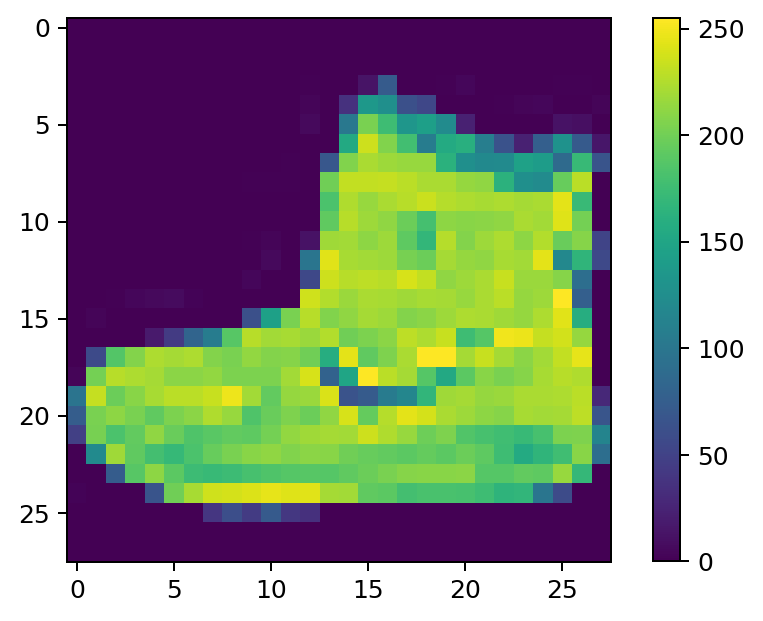

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [4]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

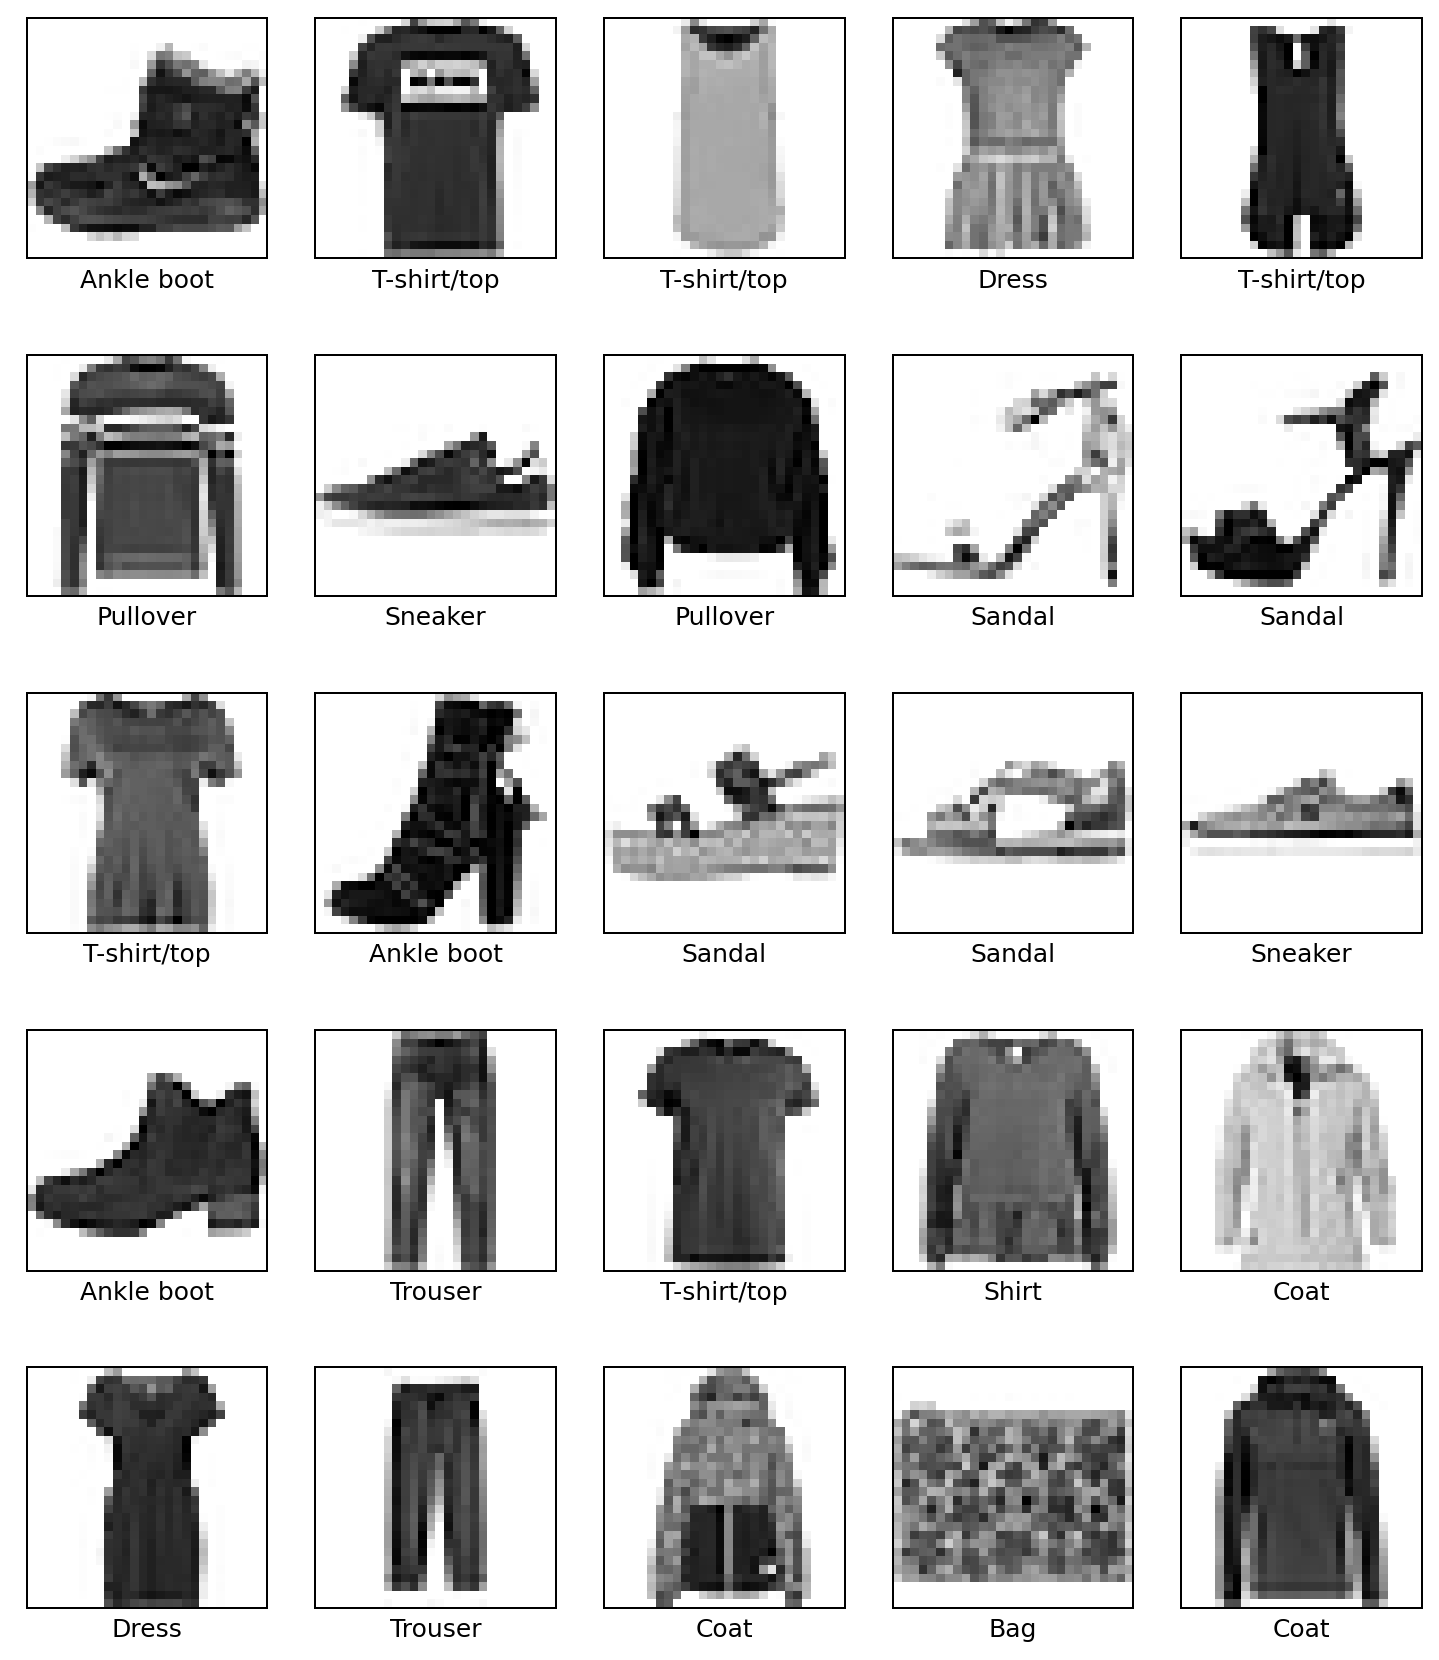

In [5]:
plt.figure(figsize=(10, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

## 7.2 全连接神经网络
### 7.2.1 构建模型

In [7]:
from tensorflow import keras

L = keras.layers

model = keras.Sequential([
    L.Flatten(input_shape=(28, 28)),
    L.Dense(128, activation=tf.nn.relu),
    L.Dense(10, activation=tf.nn.softmax)
])

### 7.2.2 编译模型

In [11]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 7.2.3 训练模型

In [12]:
model.fit(train_images_norm,
          train_labels,
          epochs=5,             # 总共训练 5 轮
          validation_split=0.2)  # 使用 20% 数据作为验证数据

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5200 - accuracy: 0.8181 - val_loss: 0.4509 - val_accuracy: 0.8352
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3866 - accuracy: 0.8606 - val_loss: 0.3838 - val_accuracy: 0.8591
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3469 - accuracy: 0.8725 - val_loss: 0.3596 - val_accuracy: 0.8676
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3209 - accuracy: 0.8819 - val_loss: 0.3885 - val_accuracy: 0.8612
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2991 - accuracy: 0.8906 - val_loss: 0.3468 - val_accuracy: 0.8767


### 7.2.4 评估模型

In [13]:
test_loss, test_acc = model.evaluate(test_images_norm, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3705 - accuracy: 0.8676
Test accuracy: 0.8676000237464905


In [14]:
predictions = model.predict(test_images_norm)
print(predictions[0])

[2.9885164e-04 4.2699796e-07 2.9988529e-05 7.8017565e-06 3.4857938e-05
 1.2300669e-01 3.2477803e-04 5.7956357e-02 4.0500737e-03 8.1429017e-01]


### 7.2.5 预测

In [15]:
import numpy as np
np.argmax(predictions[0]) # 输出 9

9

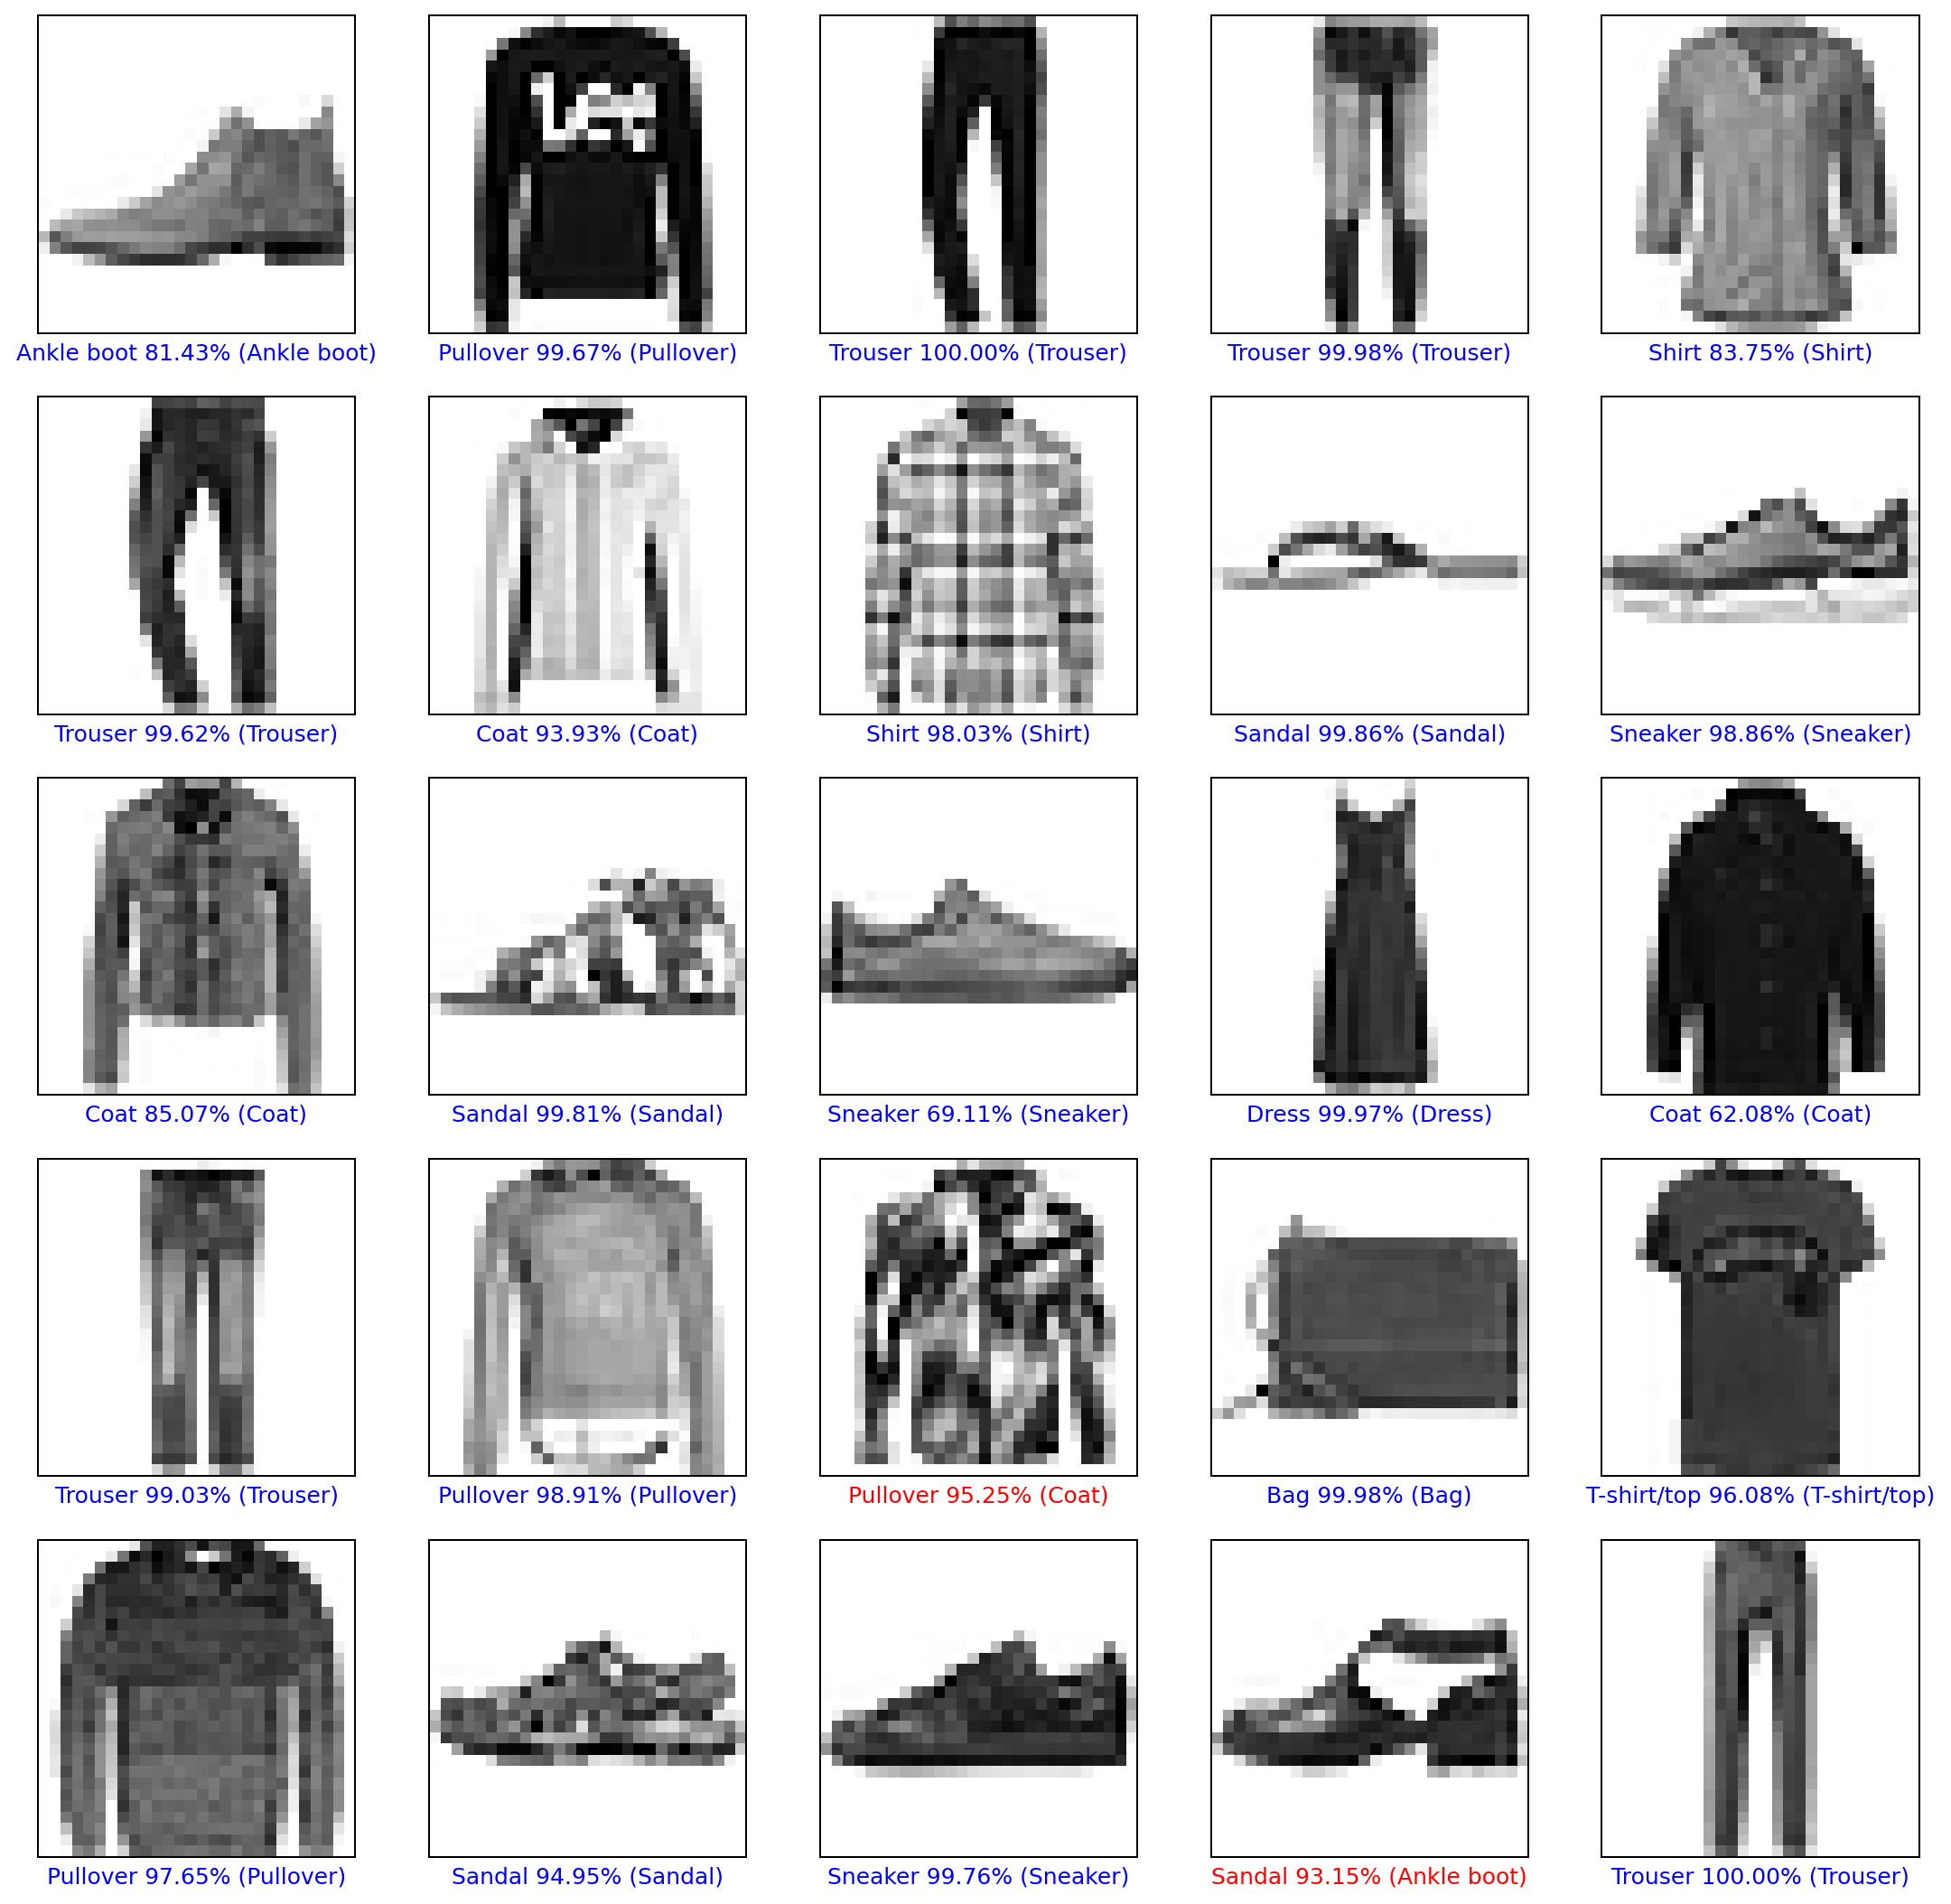

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 180
plt.rcParams['axes.grid'] = False

plt.figure(figsize=(15, 15))

for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])

    image = test_images_norm[index]
    true_label = test_labels[index]
    predict_array = predictions[index]

    plt.imshow(image, cmap=plt.cm.binary)

    predict_label = np.argmax(predict_array)

    if predict_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    predict_label = f"{class_names[predict_label]}"
    predict_probility = f"{100*np.max(predict_array):2.2f}"
    label = f"{predict_label} {predict_probility}% ({class_names[true_label]})"
    plt.xlabel(label, color=color)
plt.show()

### 7.2.6 代码总结

In [17]:
# 引入依赖
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import keras

plt.rcParams['figure.dpi'] = 180
plt.rcParams['axes.grid'] = False

# 加载数据
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 数据归一化
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

L = keras.layers

# 构建模型
model = keras.Sequential([
    L.Flatten(input_shape=(28, 28)),
    L.Dense(128, activation=tf.nn.relu),
    L.Dense(10, activation=tf.nn.softmax)
])

# 编译模型
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
model.fit(train_images_norm,
          train_labels,
          epochs=5,              # 总共训练 10 轮
          validation_split=0.2)   # 使用 20% 数据作为验证数据

# 评估模型
test_loss, test_acc = model.evaluate(test_images_norm, test_labels)
print(f'Test accuracy: {test_acc}')

# 预测模型
predictions = model.predict(test_images_norm)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5238 - accuracy: 0.8160 - val_loss: 0.4219 - val_accuracy: 0.8502
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3902 - accuracy: 0.8584 - val_loss: 0.3836 - val_accuracy: 0.8610
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3455 - accuracy: 0.8740 - val_loss: 0.3735 - val_accuracy: 0.8630
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3186 - accuracy: 0.8825 - val_loss: 0.3466 - val_accuracy: 0.8750
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8707
Test accuracy: 0.8707000017166138


In [ ]:
conv_model = keras.Sequential([
    # 卷积层，包括 32 个 5x5 的卷积核，输出维度为 [28-3+1, 28-3+1, 32]
    L.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=3, strides=1),
    # 池化层
    L.MaxPool2D(pool_size=2, strides=2),
    # 卷积层
    L.Conv2D(filters=64, kernel_size=3, strides=1),
    # 池化层
    L.MaxPool2D(pool_size=2, strides=2),
    L.Flatten(),
    L.Dense(256, activation=tf.nn.relu),
    L.Dense(10, activation=tf.nn.softmax)
])

conv_model.compile(optimizer=tf.optimizers.Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

conv_model.summary()

# 由于 Conv2D 需要三个维度的张量输入
# 把数据从 [28, 28] 即 [x轴色彩通道, y轴色彩通道] 转换成 [x轴, y轴, 色彩通道] 即 [28, 28, 1]
train_images_reshape = train_images_norm.reshape([-1, 28, 28, 1])
test_images_reshape = test_images_norm.reshape([-1, 28, 28, 1])

# 训练模型
conv_model.fit(train_images_reshape,
               train_labels,
               epochs=5,             # 总共训练 10 轮
               validation_split=0.2)  # 使用 20% 数据作为验证数据)

# 评估模型
test_loss, test_acc = conv_model.evaluate(test_images_reshape, test_labels)
print(f'Conv model test accuracy: {test_acc}')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               409856    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               